## Importing necessary Libraries

In [59]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

## API Keys

In [2]:
consumer_key= 'c7u5EE29ICqnns6NC0C'
consumer_secret= 'vDt174T8SfDmXarcRXlDIe7MYPLSforfiXTvY98pT'
access_token= '2701903-0Mcuhi5WjSeGZZ7CY7pnavSXdi6BpM52'
access_token_secret= 'mD1hceq9FN8VIV2tbBFvQ9wd1Hq8Hb2di2xSo'

## API key Auth

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

## Get tweets using API

In [60]:
search_term = "#xbox+series+x -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-01-01').items(100)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

['UK Retailer Warns Of More Potential Xbox Series X Delivery Delays https://t.co/R5MRbC6bwd #Repost #Xbox… https://t.co/kXa8HZWOFx',
 'The Xbox Series X Looks Surprisingly Small Next To The PS5 https://t.co/qj8FGBDmPr #Xbox #XboxSeriesX #PS5 https://t.co/2gJl65sWHt',
 "Please Retweet.\n\nWin a PlayStation 5 or Xbox Series X or $500 USD PayPal #Cash or a $500 USD Gift Card -- Winner's… https://t.co/yMphx3GfIm",
 'You Can Uninstall Different Parts Of Some Games On Xbox Series X|S https://t.co/rrlnhHkSGu #Repost #Xbox… https://t.co/qlggCfQOl7',
 'Walmart\n\nXbox X -  https://t.co/BEqEtchhI3\n\nXbox s - https://t.co/NCopVbn2lQ\n\n#Xbox #launch #BwcDeals #Walmart https://t.co/O4sqGQ1qIa']

### Removing the html links

In [61]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())


In [62]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['UK Retailer Warns Of More Potential Xbox Series X Delivery Delays Repost Xbox',
 'The Xbox Series X Looks Surprisingly Small Next To The PS5 Xbox XboxSeriesX PS5',
 'Please RetweetWin a PlayStation 5 or Xbox Series X or 500 USD PayPal Cash or a 500 USD Gift Card Winners',
 'You Can Uninstall Different Parts Of Some Games On Xbox Series XS Repost Xbox',
 'WalmartXbox X Xbox s Xbox launch BwcDeals Walmart']

### Create a word list fromt the tweets

In [63]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['uk',
  'retailer',
  'warns',
  'of',
  'more',
  'potential',
  'xbox',
  'series',
  'x',
  'delivery',
  'delays',
  'repost',
  'xbox'],
 ['the',
  'xbox',
  'series',
  'x',
  'looks',
  'surprisingly',
  'small',
  'next',
  'to',
  'the',
  'ps5',
  'xbox',
  'xboxseriesx',
  'ps5']]

## Counting the occurence of words

In [64]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('xbox', 127),
 ('x', 91),
 ('series', 73),
 ('the', 44),
 ('xboxseriesx', 19),
 ('to', 18),
 ('launch', 18),
 ('i', 18),
 ('of', 17),
 ('controller', 17),
 ('for', 17),
 ('bwcdeals', 16),
 ('and', 15),
 ('are', 14),
 ('is', 13)]

### Join all the tweets for wordcloud

In [93]:

for_wordcloud = ' '.join(all_words_no_urls)

In [94]:
for_wordcloud

'uk retailer warns of more potential xbox series x delivery delays repost xbox the xbox series x looks surprisingly small next to the ps5 xbox xboxseriesx ps5 please retweetwin a playstation 5 or xbox series x or 500 usd paypal cash or a 500 usd gift card winners you can uninstall different parts of some games on xbox series xs repost xbox walmartxbox x xbox s xbox launch bwcdeals walmart bestbuybox x black controller xbox launch bwcdeals xbox x launched linkstargetxbox x white controller blac xbox one series x confirmed pre order from gamestop ebay marley the brown wood owl representing thefalconeer which launches on pc and xbox one november 10thits also a i think xbox series x should get a exclusive spiky redesign for turkey following the steep spike in pricing the x box series x and the ps5 both look ugly as fuckthere i said itxbox playstation xboxseriesx ps5 walmartxbox x xbox s xbox launch bwcdeals walmart bestbuybox x black controller xbox launch bwcdeals xbox x launched links ar

### Generate a dataframe of word frequency

In [65]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,xbox,127
1,x,91
2,series,73
3,the,44
4,xboxseriesx,19


### Bar graph of word frequency

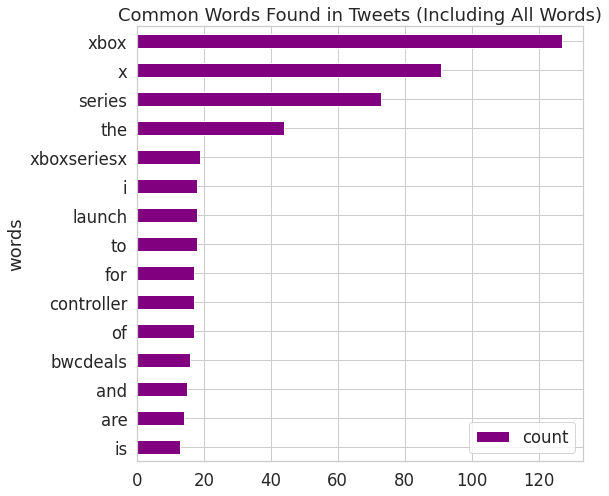

In [66]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

### Bar graph of word frequency after removing stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


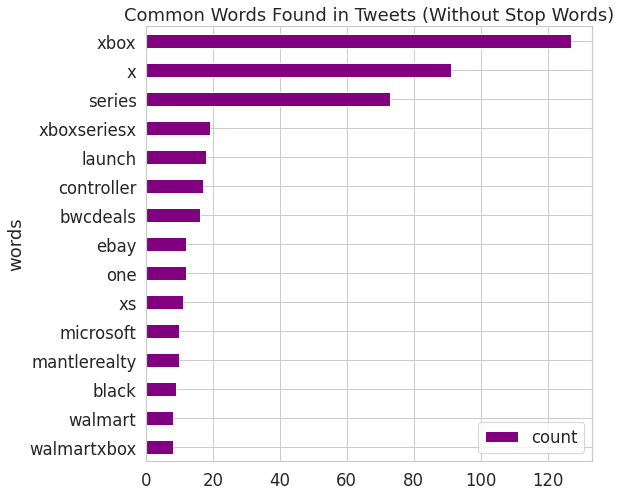

In [67]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

## Get tweets for sentiment analysis

In [70]:
from textblob import TextBlob

search_term = "#xbox+series+x -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-06-01').items(1500)

# Remove URLs and create textblob object for each tweet
all_tweets_no_urls = [TextBlob(remove_url(tweet.text)) for tweet in tweets]

all_tweets_no_urls[:5]

[TextBlob("UK Retailer Warns Of More Potential Xbox Series X Delivery Delays Repost Xbox"),
 TextBlob("The Xbox Series X Looks Surprisingly Small Next To The PS5 Xbox XboxSeriesX PS5"),
 TextBlob("Please RetweetWin a PlayStation 5 or Xbox Series X or 500 USD PayPal Cash or a 500 USD Gift Card Winners"),
 TextBlob("You Can Uninstall Different Parts Of Some Games On Xbox Series XS Repost Xbox"),
 TextBlob("WalmartXbox X Xbox s Xbox launch BwcDeals Walmart")]

### Polarity of the tweets

In [71]:
# Calculate polarity of tweets
wild_sent_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in all_tweets_no_urls]

# Create dataframe containing polarity values and tweet text
wild_sent_df = pd.DataFrame(wild_sent_values, columns=["polarity", "tweet"])
wild_sent_df = wild_sent_df[wild_sent_df.polarity != 0]

wild_sent_df.head()

,polarity,tweet
0,0.250000,UK Retailer Warns Of More Potential Xbox Serie...
1,-0.125000,The Xbox Series X Looks Surprisingly Small Nex...
5,-0.166667,BestBuybox X Black Controller Xbox launch BwcD...
7,0.400000,Xbox One Series X CONFIRMED PRE ORDER from Gam...
10,-0.700000,The X Box Series X and the PS5 both look ugly ...


### Histogram plot of polarity

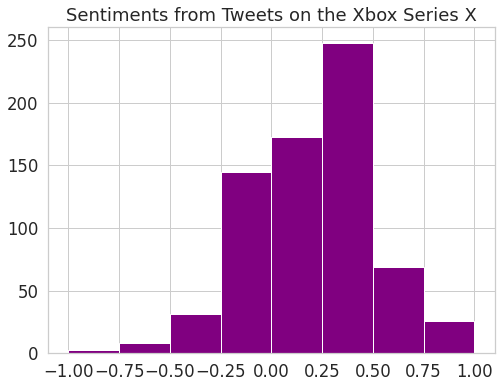

In [73]:
fig, ax = plt.subplots(figsize=(8, 6))

wild_sent_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="purple")

plt.title("Sentiments from Tweets on the Xbox Series X")
plt.show()

## Function to generate wordcloud

In [84]:
from wordcloud import WordCloud, STOPWORDS

In [85]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

### Wordcloud

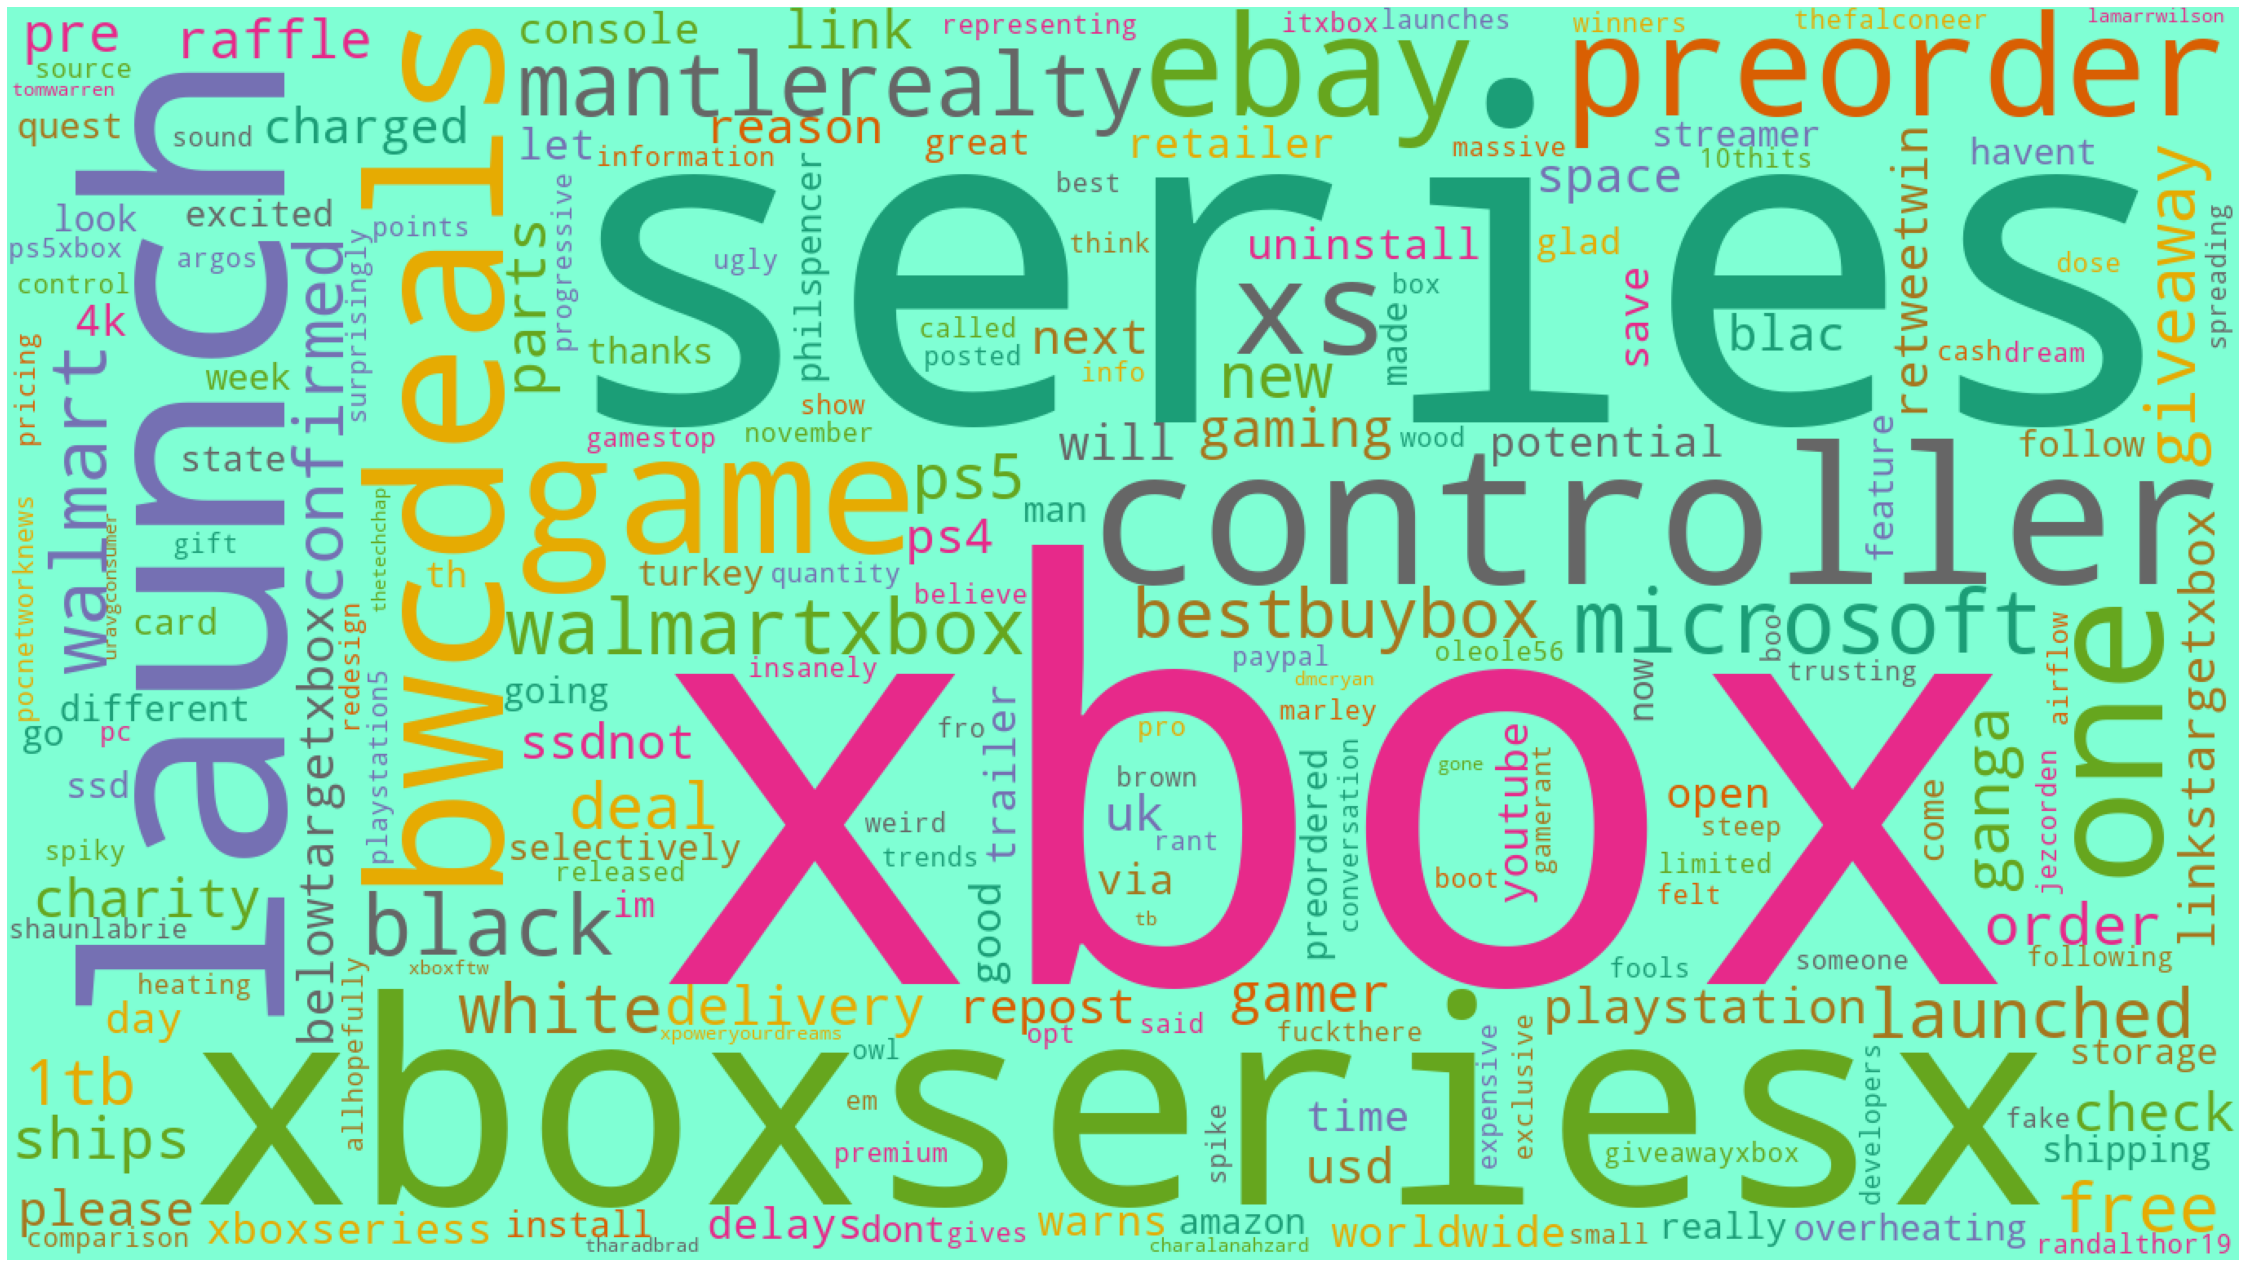

In [98]:
# Generate word cloud
wordcloud = WordCloud(width = 1368, height = 768, random_state=1, background_color='aquamarine', colormap='Dark2', collocations=False, stopwords = STOPWORDS).generate(for_wordcloud)
# Plot
plot_cloud(wordcloud)